In [1]:
from fetch_tweets import SearchTweets
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import html
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

plt.style.use("ggplot")

sid = SentimentIntensityAnalyzer()
nlp = spacy.load("en_core_web_lg")

### Select the hashtags to fetch the tweets

In [2]:
# the argument take either a single string or a list of string
reopen = SearchTweets(['reopen', 'reopening'])
reopen.fetch_tweets()

Saved the tweets to twitter_#reopen_#reopening.txt


### Read the fetched tweets

In [3]:
tweets_file = open("twitter_#reopen_#reopening.txt", "r")

# Read in tweets and store in list: tweets
tweets =[json.loads(line) for line in tweets_file]

tweets_file.close()

# Convert the json to the dataframe 
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,Sat Jun 06 19:42:26 +0000 2020,1269353978505998338,1269353978505998338,Mosque opening puts DMW in tizzy\nhttps://t.co...,False,"[0, 180]","{'hashtags': [{'text': 'Makkah_Masjid', 'indic...","{'media': [{'id': 1269353090718633984, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
1,Sat Jun 06 19:31:48 +0000 2020,1269351302506708995,1269351302506708995,Hoping there’s not many more of these #saturda...,False,"[0, 191]","{'hashtags': [{'text': 'saturdaynights', 'indi...","{'media': [{'id': 1269351297322496000, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
2,Sat Jun 06 19:25:34 +0000 2020,1269349732129730561,1269349732129730561,Gnocchi allo Scoglio\n\nHandmade Pasta with Re...,False,"[0, 243]","{'hashtags': [{'text': 'ThisIsArtusi', 'indice...","{'media': [{'id': 1269349727377584130, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
3,Sat Jun 06 19:25:02 +0000 2020,1269349601074720768,1269349601074720768,"#Salons, #Barbershops and Personal Care #Servi...",False,"[0, 105]","{'hashtags': [{'text': 'Salons', 'indices': [0...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
4,Sat Jun 06 19:23:44 +0000 2020,1269349270517317632,1269349270517317632,Good article on the #FreeMarket's ability for ...,False,"[0, 246]","{'hashtags': [{'text': 'FreeMarket', 'indices'...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,False,en,NaN,NaN,NaN


### Extract the relevant info from the tweet status 

In [4]:
tweets_df.source = [re.sub(r'<.+?>', '', x) for x in tweets_df.source]
tweets_df['user_id_str'] = [user['id_str'] for user in tweets_df.user]
tweets_df['user_name'] = [user['name'] for user in tweets_df.user]
tweets_df['user_screen_name'] = [user['screen_name'] for user in tweets_df.user]
tweets_df['user_location'] = [user['location'] for user in tweets_df.user]
tweets_df['user_profile'] = [user['description'] for user in tweets_df.user]
tweets_df['tweets_count'] = [user['statuses_count'] for user in tweets_df.user]
tweets_df['user_profile_image'] = [user['profile_image_url_https'] for user in tweets_df.user]
tweets_df['user_profile_banner'] = \
    [False if "profile_banner_url" not in user else user['profile_banner_url'] for user in tweets_df.user]
tweets_df['if_notifications'] = [user['notifications'] for user in tweets_df.user]

In [5]:
# list_tags = []
# for tweet in tweets_df.entities:
#     temp = []
#     for hashtag in tweet['hashtags']:
#         temp.append(hashtag['text'])
#     list_tags.append(" ".join(temp))
# tweets_df['hashtags'] = list_tags 

In [6]:
# filter down to target columns 
target_col = ['created_at', 'id_str', 'full_text', 'user_id_str', 'user_name',
                'user_screen_name','user_location', 'user_profile', 'tweets_count', 'user_profile_image',
                'user_profile_banner', 'if_notifications']

In [7]:
tweets_df = tweets_df[target_col]

In [8]:
tweets_df.head()

,created_at,id_str,full_text,user_id_str,user_name,user_screen_name,user_location,user_profile,tweets_count,user_profile_image,user_profile_banner,if_notifications
0,Mon May 11 18:19:01 +0000 2020,1259910903065124865,@HuffPostPol If they keep it up #reopen and nu...,1255626730817097728,germano,_g__x,"New Hampshire, USA",I’m #union I #vote #organize #protest march an...,583,https://pbs.twimg.com/profile_images/125733420...,https://pbs.twimg.com/profile_banners/12556267...,False
1,Mon May 11 18:18:34 +0000 2020,1259910789437231105,In Pictures: Shanghai Disneyland reopens - BBC...,2803733928,Richard Norman Poet,ElmerPalaceSE25,"Brighton, England","Employee Benefits Manager, Sports Fan, Music L...",21849,https://pbs.twimg.com/profile_images/846709045...,https://pbs.twimg.com/profile_banners/28037339...,False
2,Mon May 11 18:17:36 +0000 2020,1259910545312043011,As Virginia plans for Phase One of reopening b...,18937089,Sands Anderson PC,SandsAnderson,"Virginia, North Carolina","Lawyers and legal services for business, inves...",2321,https://pbs.twimg.com/profile_images/125837105...,https://pbs.twimg.com/profile_banners/18937089...,False
3,Mon May 11 18:17:24 +0000 2020,1259910493373784065,"The #UK is posed to #reopen many industries, i...",733878114011381760,Farista Sairuv,FSairuv,"Edmonton, Alberta, Canada",,7980,https://pbs.twimg.com/profile_images/833022392...,https://pbs.twimg.com/profile_banners/73387811...,False
4,Mon May 11 18:16:38 +0000 2020,1259910299844513793,Businesses must take #properprecautions to #sa...,469375119,SaveEnergySystems,SaveEnergySys,Massachusetts,"Simple, innovative solutions that reduce energ...",415,https://pbs.twimg.com/profile_images/124068662...,https://pbs.twimg.com/profile_banners/46937511...,False


### Use the text below as a example to do match up because I do not use Twitter 

In [9]:
# use the pre-trained model Vader to predict the sentiment on the text  
sid.polarity_scores('reopen is not smart')

{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.3089}

In [10]:
# calculate the absolute difference between my sentiment and others 
tweets_df['diff_sentiment_score'] = [abs(-0.3089 - sid.polarity_scores(x)['compound']) for x in tweets_df.full_text]

In [11]:
# the top 15 users having the close sentiments 
matched_idx = tweets_df.diff_sentiment_score.sort_values()[0:15].index
matched_name = tweets_df[tweets_df.index.isin(matched_idx)].user_screen_name.tolist()

### Fetch the 10 recent tweets in the matched user's timeline for further matches (not including retweets)

In [19]:
list_user_timeline = []

for user in matched_name:
    
    #print(user) #just in case some users would cancel their accounts 
    
    i = 0
    matched_user_timeline = []
    max_id = None
    
    while (i < 10):
        
        statuses = api.user_timeline(screen_name = user, count =10, max_id = max_id, tweet_mode = 'extended')
        
        # because list.extend() modifies the list in place. It doesn't create a new list. The convention in Python is 
        # to then return None becauses you already have a reference to the object. The same applies to dict.update(), set.add()
        # e.g: tt = [] tt.extend([1,2]) len(tt)
        matched_user_timeline.extend([x._json['full_text'] for x in statuses \
                                      if not hasattr(x, "retweeted_status") and x._json['in_reply_to_status_id'] == None])#including  relpies or not?
        
        i = len(matched_user_timeline)
        
        if i < 10:
            max_id = statuses[-1]._json['id_str']
            
    list_user_timeline.append(" ".join(matched_user_timeline[0:10]))

In [3]:
import pickle

In [ ]:
# with open("user_timeline.txt", "wb") as fp:   #Pickling
#     pickle.dump(list_user_timeline, fp)

In [4]:
with open("user_timeline.txt", "rb") as fp:   # Unpickling
    list_user_timeline = pickle.load(fp)

### Data preprocessing 

In [5]:
list_text_lemma = []

for text in list_user_timeline:
    
    text = html.unescape(text) # remove the HTML entities   
    text = re.sub(r'\n|#', '', text) #remove '#'
    text = re.sub(r'https:\/\/\S+', '', text) #remove hyperlinks 
    text = re.sub(r'@\w+', '', text) #remove the people mentioned 
    
    # Convert "AaBbCc" to ["Aa","Bb", "Cc"]
    text = " ".join([" ".join(re.findall(r'[A-Z][a-z]+',x)) if re.match(r'(?:[A-Z][a-z]+){2,}',x) else x for x in text.split()])
    
    doc = nlp(text) # tokenize each tweet to tokens 
    
    # Keep only the noun and verb
    clean_text = ' '.join([token.lemma_ for token in doc if token.pos_ in ['PROPN','NOUN','VERB'] and token.text.isalpha()])
     
    list_text_lemma.append(clean_text.lower())

In [6]:
# tweets in the timeline for each user are merged into a short document 
list_text_lemma

['jason jordan thank put automate thank tweet follow help reach subscriber youtube will return favor follow will subscribe channel thank jason jordan follow ff follow travel avritt favorites daily picks thank travel disney hi babu bhaiya direct babu thank put automate thank tweet follow help reach subscriber youtube will return favor follow will subscribe channel thank babu bhaiya direct babu follow ff follow travel hi gladys redd thank put automate thank tweet follow help reach subscriber youtube will return favor follow will subscribe channel thank gladys redd follow ff follow travel eat lemon expression challenge husband vs wife new video alert drop watch need oven air fryer pressure cooker crockpot dehydrator can ninji foodi love space saving time saving kitchen food foodie brady myers thank put automate thank tweet follow help reach subscriber youtube will return favor follow will subscribe channel',
 'aliens jam phone line california offer coronavirus relief ca ask government bai

### NMF to do topic modelling

In [29]:
# ignore terms that appear in less than 2 documents and more than 95%
# min -> all zero, max -> all one
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
list_timeline = vectorizer.fit_transform(list_text_lemma)
terms = vectorizer.get_feature_names()

In [30]:
import gensim
import random
from itertools import combinations

In [31]:
tokens = [x.split() for x in list_text_lemma]

In [32]:
# use gensim word2vec to embedding words using skipgram
w2v_model = gensim.models.Word2Vec(tokens, size=500, min_count=2, sg=1)

In [33]:
#w2v_model.wv.vocab

#### to select the best k (the number of topics) by evaluating the topic coherence 

In [34]:
def create_nmf(k):
    
    model = NMF(n_components= k, random_state=42, init="nndsvd")
    doc_topics = model.fit_transform( list_timeline )
    topic_terms = model.components_    

    return topic_terms

In [35]:
# term_rankings - a list of K topics with top n words for each topic model 
def calculate_coherence( w2v_model, term_rankings ):
    """compute overall coherence for each NMF model"""
    
    overall_coherence = 0.0
    
    for topic_index in range(len(term_rankings)): # number K
        # check each pair of terms
        pair_scores = []
        
        for pair in combinations( term_rankings[topic_index], 2 ): # similarity between top n words by topic by model
            
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        
        # get the mean for all pairs in this topic
        
        topic_score = sum(pair_scores) / len(pair_scores)
        
        overall_coherence += topic_score
    
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [36]:
def get_descriptor( all_terms, topic_terms, topic_index, top ):
    """get top_terms for each topic"""
    
    # reverse sort the values to sort the indices 
    ordered_terms_indices = np.argsort( topic_terms[topic_index,:] )[::-1]
    
    # now get the terms corresponding to the top-ranked indices
    
    top_terms = []
    
    for term_index in ordered_terms_indices[0:top]:
        
        top_terms.append( all_terms[term_index] )
    
    return top_terms #per topic per model 

In [38]:
k_values = []
coherences = []

for k in range(2,len(list_text_lemma)):
    
    k_values.append( k ) # for plot
    
    topic_terms = create_nmf(k) # create models
    # Get all of the topic descriptors - the term_rankings, based on top 6 terms
    term_rankings = []
    
    for topic_index in range(k):
        
        term_rankings.append( get_descriptor( terms, topic_terms, topic_index, 6 ) )
    # Now calculate the coherence based on our Word2vec model 
    
    overall_coherence_doc = calculate_coherence( w2v_model, term_rankings ) 
    # placeholders for digits and floats
    print("K=%02d: Coherence=%.4f" % ( k, overall_coherence_doc ))
    
    coherences.append(overall_coherence_doc) # for plot

K=02: Coherence=0.1744
K=03: Coherence=0.1704
K=04: Coherence=0.1585
K=05: Coherence=0.1648
K=06: Coherence=0.1647
K=07: Coherence=0.1557
K=08: Coherence=0.1568
K=09: Coherence=0.1575
K=10: Coherence=0.1502
K=11: Coherence=0.1488
K=12: Coherence=0.1521
K=13: Coherence=0.1528
K=14: Coherence=0.1591


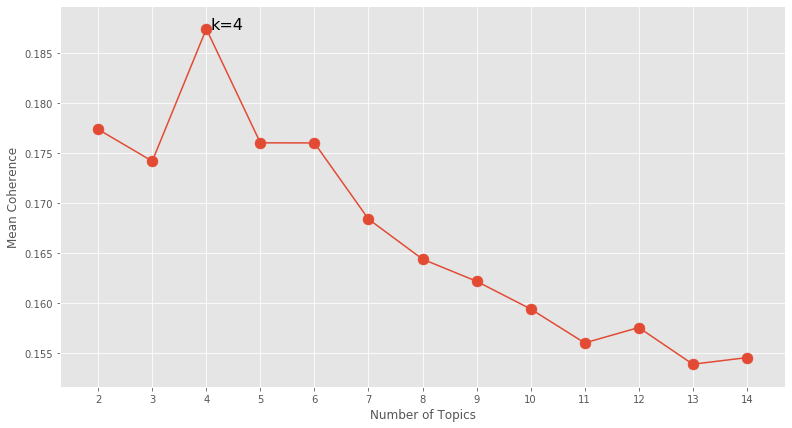

In [186]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

### use the best k value to do topic modelling

In [187]:
nmf_model = NMF(n_components= best_k, random_state=42, init="nndsvd")

In [188]:
nmf_model.fit(list_text_lemma)

NMF(init='nndsvd', n_components=4, random_state=42)

In [189]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 6 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-6:]])
    print('\n')

THE TOP 6 WORDS FOR TOPIC #0
['day', 'thing', 'know', 'say', 'wear', 'mask']


THE TOP 6 WORDS FOR TOPIC #1
['daily', 'watch', 'reach', 'help', 'tweet', 'thank']


THE TOP 6 WORDS FOR TOPIC #2
['ask', 'government', 'teacher', 'plan', 'reopen', 'school']


THE TOP 6 WORDS FOR TOPIC #3
['death', 'people', 'day', 'coronavirus', 'month', 'trump']




### Attaching discovered topic labels to each user's timeline

In [190]:
topic_results = nmf_model.transform(list_text_lemma)

In [191]:
match_results = pd.DataFrame(data={'username': matched_name})

In [192]:
match_results['name'] = tweets_df[tweets_df.index.isin(matched_idx)].user_screen_name.tolist()

In [193]:
match_results['profile_image_url'] =  tweets_df[tweets_df.index.isin(matched_idx)].user_profile_image.tolist()

In [194]:
match_results['#reopen'] =  tweets_df[tweets_df.index.isin(matched_idx)].full_text.tolist()

In [195]:
match_results['sentiment_score'] = [sid.polarity_scores(x)['compound'] for x in match_results['#reopen']]

In [196]:
match_results['diff_sentiment_score'] =  tweets_df[tweets_df.index.isin(matched_idx)].diff_sentiment_score.tolist()

In [197]:
match_results['topic'] = topic_results.argmax(axis=1)

In [198]:
topic_term = dict()

for index,term in enumerate(nmf_model.components_):
    topic_term.update({f'{index}' : [vectorizer.get_feature_names()[i] for i in term.argsort()[-6:]]})


In [199]:
match_results['key_words'] = [topic_term[f'{x}'] for x in match_results.topic]

In [200]:
match_results = match_results.sort_values(by=['diff_sentiment_score'])

In [201]:
# the top 15 users having the close sentiments on #reopen and their recent topics
match_results

,username,name,profile_image_url,#reopen,sentiment_score,diff_sentiment_score,topic,key_words
3,J04nn6F,J04nn6F,https://pbs.twimg.com/profile_images/121357328...,It is not acceptable to find out the governmen...,-0.3080,0.0009,2,"[ask, government, teacher, plan, reopen, school]"
1,cruisetravelby1,cruisetravelby1,https://pbs.twimg.com/profile_images/125744610...,@sleepyjoe2 @mkhammer During this entire pande...,-0.3067,0.0022,0,"[day, thing, know, say, wear, mask]"
5,karimabennoune,karimabennoune,https://pbs.twimg.com/profile_images/866791055...,As #States &amp;businesses #reopen despite ins...,-0.3125,0.0036,3,"[death, people, day, coronavirus, month, trump]"
9,xiphodaimon,xiphodaimon,https://pbs.twimg.com/profile_images/125314942...,Erm... That seems extreme.\n\nWhy are T* and t...,-0.3052,0.0037,0,"[day, thing, know, say, wear, mask]"
10,CellarNorthside,CellarNorthside,https://pbs.twimg.com/profile_images/980983813...,Working hard organizing for our re-opening sal...,-0.3129,0.0040,3,"[death, people, day, coronavirus, month, trump]"
13,sacraficial,sacraficial,https://pbs.twimg.com/profile_images/899069544...,Trump is going to kill you so he can have a ra...,-0.3018,0.0071,3,"[death, people, day, coronavirus, month, trump]"
6,msilcommand,msilcommand,https://pbs.twimg.com/profile_images/110920714...,@Rip_Narfer RE: the Republican #reopen movemen...,-0.3164,0.0075,3,"[death, people, day, coronavirus, month, trump]"
12,Snellk,Snellk,https://pbs.twimg.com/profile_images/102049493...,Why Premier Francois Legault's plan to reopen ...,-0.3167,0.0078,2,"[ask, government, teacher, plan, reopen, school]"
0,AvrittFavorites,AvrittFavorites,https://pbs.twimg.com/profile_images/121549052...,#ShanghaiDisneyland to #reopen amid Disney's $...,-0.3182,0.0093,1,"[daily, watch, reach, help, tweet, thank]"
2,VitalAnon,VitalAnon,https://pbs.twimg.com/profile_images/125543953...,https://t.co/19hqlbqinZ\nAmerican #Shopping Ma...,-0.3182,0.0093,3,"[death, people, day, coronavirus, month, trump]"


In [202]:
import joblib

In [204]:
# used for display in the flask app later
joblib.dump(match_results.to_dict(orient='records'), 'flask_tweets.pkl') # change to dict

['flask_tweets.pkl']